# Task 4- Creating the Decision Tree Classsifier and Visualizing it Graphically

# Decision Tree Algorithm

   Decison Tree algorithm belong to family of supervised learning algorithm. Unlike other supervised learning algorithms the      decision tree algorithm can be used for solving for regression and classification problem too.   

# Problem:
   
   For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed      any new data to this classifier, it would be able to predict the right class accordingly.    

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets  # For loading the data

# Loading the iris data

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Species'] = iris.target

# Let's look how our data look likes

In [3]:
data.shape

(150, 5)

In [4]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [5]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualizing the data point , so that we can have a better understanding our data and it's distribution.

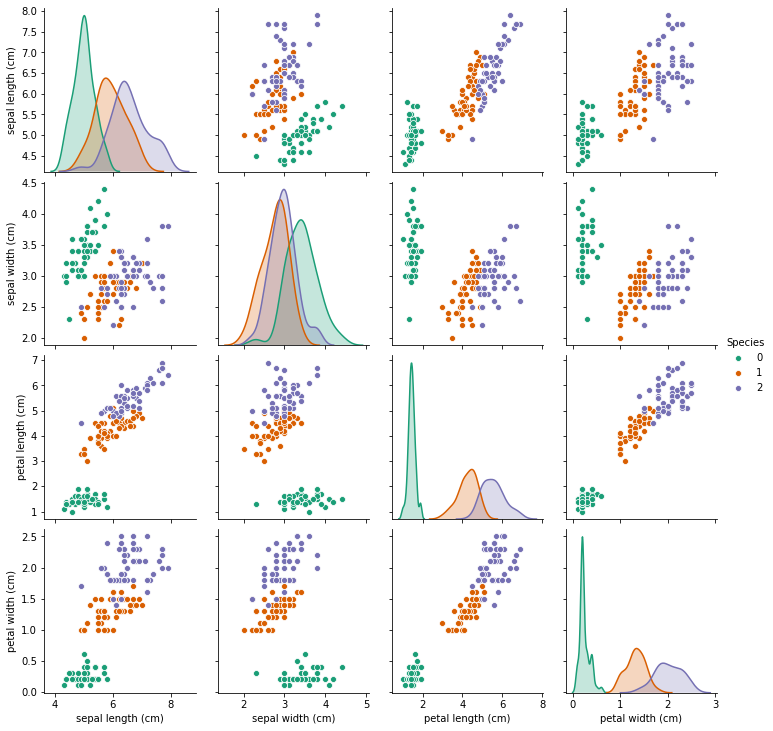

In [8]:
sns.pairplot(data, height=2.5, diag_kind="kde", hue='Species', palette='Dark2')

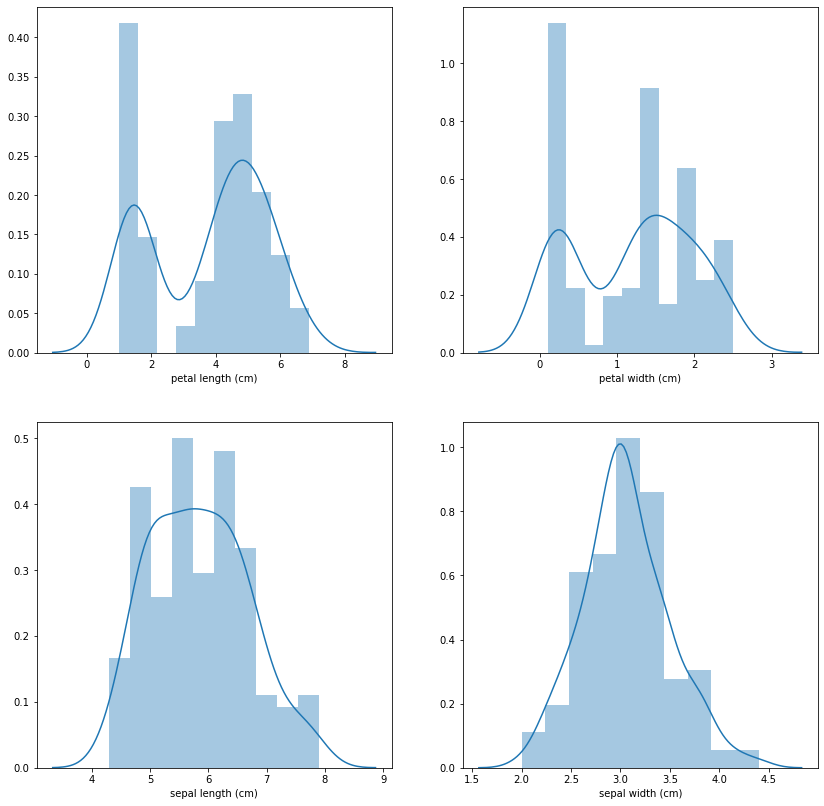

In [9]:

plt.figure(figsize=(14, 14))
binsize = 10
plt.subplot(2, 2, 1)
sns.distplot(a=data["petal length (cm)"], bins=binsize)
plt.subplot(2, 2, 2)
sns.distplot(a=data["petal width (cm)"], bins=binsize)
plt.subplot(2, 2, 3)
sns.distplot(a=data["sepal length (cm)"], bins=binsize)
plt.subplot(2, 2, 4)
sns.distplot(a=data["sepal width (cm)"], bins=binsize)

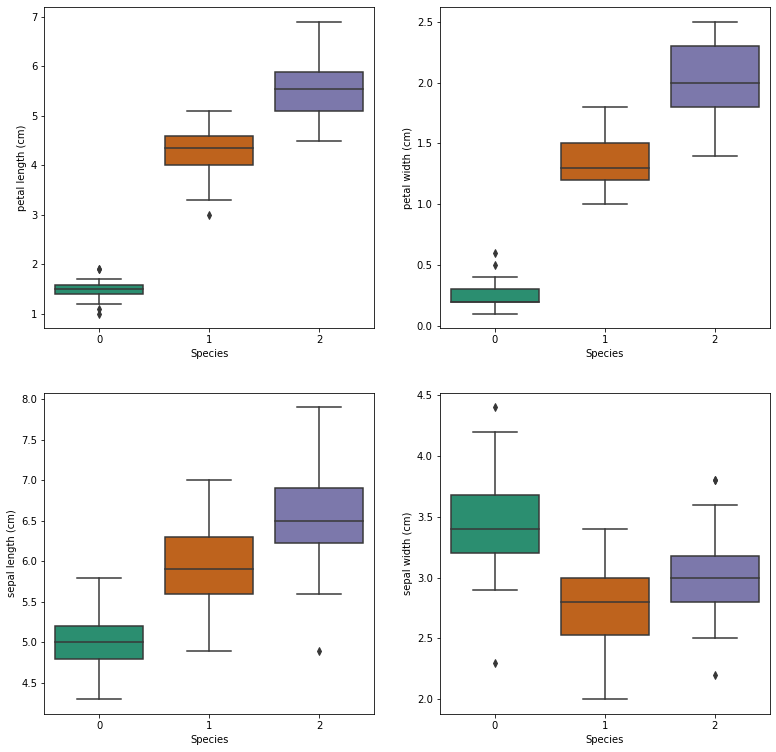

In [10]:
## Here we create box plot
plt.figure(figsize=(13, 13))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="petal length (cm)", data=data, palette='Dark2')
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="petal width (cm)", data=data, palette='Dark2')
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="sepal length (cm)", data=data, palette='Dark2')
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="sepal width (cm)", data=data, palette='Dark2')

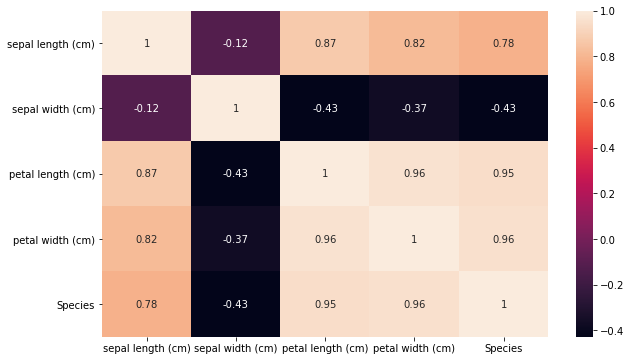

In [11]:
# Here we create the heatmap for visualizing the correlation

plt.figure(figsize=(10,6))

sns.heatmap(data.corr(), annot=True)

# Preparing the data

In [22]:
# In this step we devide the data into into attributes(input), labels(outputs)

x = data.drop('Species', axis=1)
y = data.Species

In [23]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [25]:
# Splitting the data 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
print('x_train',len(x_train))
print('y_train',len(y_train))
print('x_test',len(x_test))
print('y_test',len(y_test))

x_train 120
y_train 120
x_test 30
y_test 30


In [27]:
print('shape of x_train',x_train.shape)
print('Shape of y_train: ',y_train.shape)

print('\n')

print('Shape of X_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

shape of x_train (120, 4)
Shape of y_train:  (120,)


Shape of X_test:  (30, 4)
Shape of y_test:  (30,)


# Training algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=0)

d_tree.fit(x_train,y_train)

print('Decision Tree Classifer sucessfully Created')

Decision Tree Classifer sucessfully Created


# Let us visualize the Decision Tree to understand it better.

[Text(558.0, 996.6, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]'),
 Text(472.15384615384613, 815.4000000000001, 'gini = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0, 0.0]'),
 Text(643.8461538461538, 815.4000000000001, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 66.7%\nvalue = [0.0, 0.5, 0.5]'),
 Text(343.38461538461536, 634.2, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 36.0%\nvalue = [0.0, 0.907, 0.093]'),
 Text(171.69230769230768, 453.0, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 32.0%\nvalue = [0.0, 0.979, 0.021]'),
 Text(85.84615384615384, 271.79999999999995, 'gini = 0.0\nsamples = 31.3%\nvalue = [0.0, 1.0, 0.0]'),
 Text(257.53846153846155, 271.79999999999995, 'gini = 0.0\nsamples = 0.7%\nvalue = [0.0, 0.0, 1.0]'),
 Text(515.0769230769231, 453.0, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 4.0%\nvalue = [0.0, 0.333, 0.667]'),
 Text(429.23076923076917, 271.79999999999995, 'gini = 0.0\nsamples = 2.0%\nvalue = [0.0, 0.

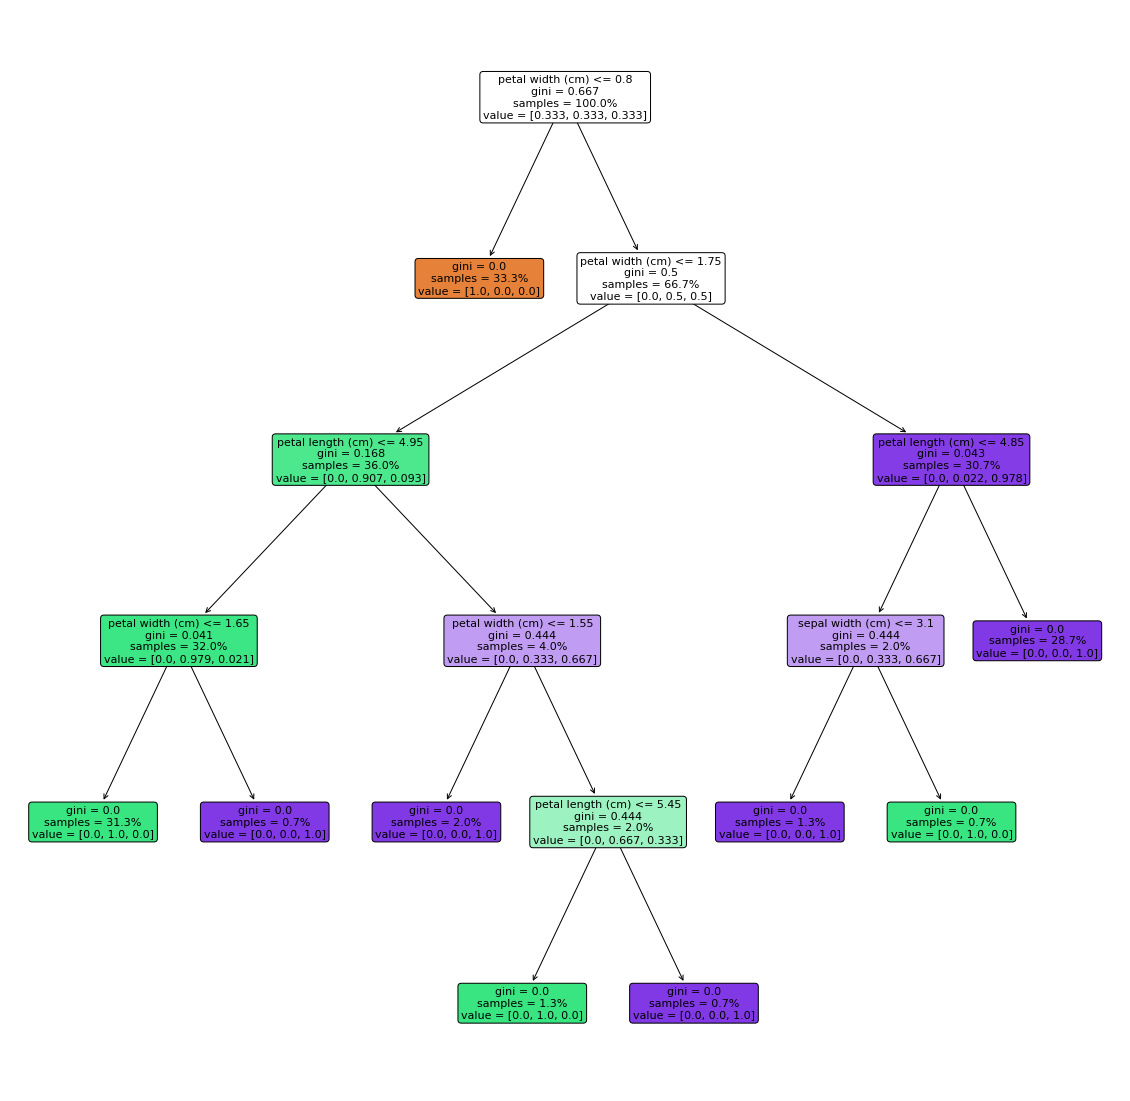

In [41]:
from sklearn import tree

tree_new=(x.columns.values)
plt.figure(figsize=(20,20))
tree.plot_tree(d_tree.fit(x,y), feature_names=tree_new, filled=True, precision=3, proportion=True, rounded=True)

In [51]:
#Predict the response for test dataset
y_pred = d_tree.predict(x_test)

#Compare between predicted and actual class
df = pd.DataFrame({'Predicted Class':y_pred, 'Actual Class':y_test})
print(df.head(10))

     Predicted Class  Actual Class
114                2             2
62                 1             1
33                 0             0
107                2             2
7                  0             0
100                2             2
40                 0             0
86                 1             1
76                 1             1
71                 1             1


In [53]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

# Evaluating the model

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

print("************************ Classification Report *************************")
print( classification_report(y_test,y_pred))
print('\n')
print("**************************** Confusion Matrix ***************************")
print(confusion_matrix(y_test,y_pred))
print('\n')
print("************************ Accuracy *************************")
print(accuracy_score(y_test,y_pred))

************************ Classification Report *************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**************************** Confusion Matrix ***************************
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


************************ Accuracy *************************
1.0
